## Import Library

In [1]:
import json
import random
import pymongo
import datetime
import pandas as pd
from random import shuffle
from tqdm import tqdm, tqdm_notebook

## Load Data From MongoDB

In [2]:
myClient = pymongo.MongoClient("mongodb://localhost:27017")
myDatabase = myClient.iStorage
myCollection = myDatabase.iData

In [3]:
categories = ['news', 'bisnis', 'sports', 'entertainment', 'tekno', 'otomotif', 'health']

In [4]:
polhukam,bisnis,olahraga,hiburan,teknologi,otomotif,kesehatan = [],[],[],[],[],[],[]

In [5]:
for category in tqdm_notebook(categories):
    temp = []
    iQuery = myCollection.find({
        'category' : category
    })
    if category == 'news':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:10000]: polhukam.append(t)
    elif category == 'bisnis':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:10000]: bisnis.append(t)
    elif category == 'sports':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:10000]: olahraga.append(t)
    elif category == 'entertainment':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:10000]: hiburan.append(t)
    elif category == 'tekno':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:10000]: teknologi.append(t)
    elif category == 'otomotif':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:10000]: otomotif.append(t)
    elif category == 'health':
        for q in iQuery: temp.append(q)
        shuffle(temp)
        for t in temp[:10000]: kesehatan.append(t)

In [6]:
for i in range(1):
    print(len(polhukam))
    print(len(bisnis))
    print(len(olahraga))
    print(len(hiburan))
    print(len(teknologi))
    print(len(otomotif))
    print(len(kesehatan))

10000
10000
10000
10000
10000
10000
10000


In [7]:
total = len(polhukam)+len(bisnis)+len(olahraga)+len(hiburan)+len(teknologi)+len(otomotif)+len(kesehatan)
print(total)

70000


## Input Data to Array

In [8]:
iData = []

In [9]:
for p in tqdm(polhukam[:10000]): iData.append(p)
for b in tqdm(bisnis[:10000]): iData.append(b)
for o in tqdm(olahraga[:10000]): iData.append(o)
for h in tqdm(hiburan[:10000]): iData.append(h)
for t in tqdm(teknologi): iData.append(t)
for ot in tqdm(otomotif): iData.append(ot)
for k in tqdm(kesehatan): iData.append(k)

100%|██████████| 10000/10000 [00:00<00:00, 1302862.11it/s]


In [10]:
len(iData)

70000

In [11]:
shuffle(iData)

## Konversi Data ke DataFrame (Pandas)

In [12]:
df = pd.DataFrame(iData)

In [13]:
df.head()

,_id,category,title,description,url,content,contentHTML,img,subCategory,publishedAt,source,cleanContent,nerContent,countNer
0,5d8e801b53c4255fb3ff4edd,otomotif,"Lorenzo Ungkap Penyebab ""Nyungsep"" di Misano","Lorenzo Ungkap Penyebab ""Nyungsep"" di Misano P...",https://otomotif.kompas.com/read/2018/09/10/17...,Pebalap Ducati Jorge Lorenzo gagal naik podium...,[Pebalap Ducati Jorge Lorenzo gagal naik podi...,https://asset.kompas.com/crops/5dAYLRBatHS3cAm...,Sport,10-09-2018,kompas.com,pebalap ducati jorge lorenzo gagal podium bala...,"[<div class=""entities""> Pebalap <mark class=""M...","{'person': 6, 'org': 1, 'gpe': 1, 'event': 1, ..."
1,5d8e99bc5310b0648a463e56,entertainment,David NAIF Pamer Dada Bidang di Panggung Synch...,David NAIF Pamer Dada Bidang di Panggung Synch...,https://entertainment.kompas.com/read/2018/10/...,Grup band NAIF menjadi penampil penutup Synchr...,[Grup band NAIF menjadi penampil penutup Sync...,https://asset.kompas.com/crops/pn-okTg5U-JWabB...,Musik,06-10-2018,kompas.com,grup band naif penampil penutup synchronize fe...,"[<div class=""entities""> Grup band <mark class=...","{'person': 6, 'org': 2, 'gpe': 2, 'event': 1, ..."
2,5da6c973bb6ac0db220ef32a,health,"Cerita Sukses ""Merek Bandung"" PMP Jadi Koleksi...","Cerita Sukses ""Merek Bandung"" PMP Jadi Koleksi...",https://lifestyle.kompas.com/read/2019/03/18/0...,"Akhir Juni 2018 silam, adalah hari membahagiak...","[Akhir Juni 2018 silam, adalah hari membahagia...",https://asset.kompas.com/crops/A3rDOVuJ2aoiIEw...,Look Good,18-03-2019,kompas.com,juni 2018 silam membahagiakan pemilik merek po...,"[<div class=""entities""> Akhir Juni 2018 silam,...","{'person': 2, 'org': 7, 'gpe': 8, 'event': 1, ..."
3,5da61b4437bb21aa47afcd3f,bisnis,Ajarkan Anak Kelola Uang sejak Kecil Biar Saat...,Ajarkan Anak Kelola Uang sejak Kecil Biar Saat...,https://money.kompas.com/read/2019/01/18/05540...,Mengajarkan anak mengelola keuangan ternyata s...,[Mengajarkan anak mengelola keuangan ternyata ...,https://asset.kompas.com/crops/sQALLpn7PqoNz-s...,INSPIRASI,18-01-2019,kompas.com,mengajarkan anak mengelola keuangan bermanfaat...,"[<div class=""entities""> Mengajarkan anak menge...","{'person': 2, 'org': 2, 'gpe': 1, 'event': 0, ..."
4,5da6fc2c786be43223956f27,news,Para Nyai Pesantren Bersatu Dukung Jokowi,Para Nyai Pesantren Bersatu Dukung Jokowi Ratu...,https://regional.kompas.com/read/2019/03/21/14...,Ratusan nyai pengasuh pesantren melakukan dekl...,[Ratusan nyai pengasuh pesantren melakukan d...,https://asset.kompas.com/crops/OptylX6yWPN3RKd...,Regional,21-03-2019,kompas.com,ratusan nyai pengasuh pesantren deklarasi duku...,"[<div class=""entities""> Ratusan nyai pengasuh ...","{'person': 7, 'org': 0, 'gpe': 2, 'event': 0, ..."


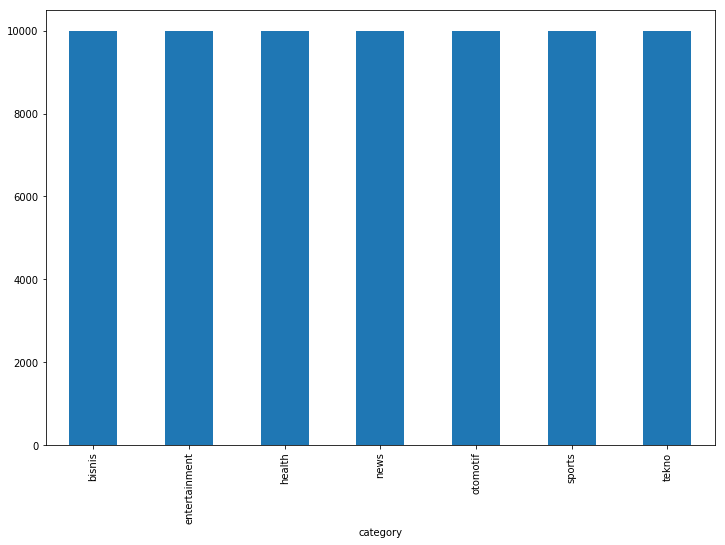

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
df.groupby('category').title.count().plot.bar(ylim=0)
plt.show()

## Menggunakan Metode Naive Bayes

In [16]:
import textacy
from sklearn.naive_bayes import MultinomialNB
from textacy.preprocess import preprocess_text
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

/home/lumierra/Project-Python/.env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
tfidf = TfidfVectorizer(min_df=1, max_df=0.25)
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['category'], random_state = 0, test_size = 0.20)

X_train_counts = count_vect.fit_transform(X_train)

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [19]:
X1 = tfidf.fit_transform(X_train)

In [20]:
X_train_tfidf.shape

(56000, 30892)

In [21]:
X1.shape

(56000, 30892)

In [22]:
modelMNB = MultinomialNB()

In [23]:
modelMNB.fit(X1, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
clf = MultinomialNB().fit(X1, y_train)

In [25]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text, fix_unicode=False, 
                                            lowercase=True, 
                                            no_urls=True,
                                            no_emails=False,
                                            no_phone_numbers=False,
                                            no_numbers=True,
                                            no_currency_symbols=False,
                                            no_punct=True)
    hasil_prediksi = clf.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [26]:
new_title = '''Berkemeja Putih ke Istana, Siapa Bupati Minahasa Selatan Tetty Paruntu?'''

In [27]:
print(get_categoryMNB(new_title))

['news']


In [28]:
print(clf.score(X1, y_train))

0.9051607142857143


## Save Model Naive Bayes MultinomialNB

In [113]:
import pickle

In [3]:
# save the model to disk
filename = 'finalized_model.sav'
# pickle.dump(clf, open(filename, 'wb'))



In [4]:
# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [55]:
loaded_model('Berkaca pada Raffi Ahmad, Waspada Penyebab Suara Serak')

TypeError: 'MultinomialNB' object is not callable

In [170]:
loaded_model.score(X1, y_train)

0.900643598312926

## Pickle

In [118]:
with open('model', 'wb') as f:
    pickle.dump(modelMNB, f)

In [119]:
with open('model', 'rb') as f:
    mp = pickle.load(f)

In [123]:
def test(text):
    result_cleanText = textacy.preprocess_text(text, fix_unicode=False, 
                                            lowercase=True, 
                                            no_urls=True,
                                            no_emails=False,
                                            no_phone_numbers=False,
                                            no_numbers=True,
                                            no_currency_symbols=False,
                                            no_punct=True)
    hasil_prediksi = mp.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [124]:
print(test(new_title))

['entertainment']


## Joblib

In [10]:
from sklearn.externals import joblib

In [126]:
joblib.dump(modelMNB, 'model_joblib')

['model_joblib']

In [127]:
mj = joblib.load('model_joblib')

In [128]:
mj.score(X1, y_train)

0.8939410971223022

In [129]:
mj.predict(tfidf.transform([new_title]))

array(['entertainment'], dtype='<U13')

## Testing

In [63]:
import requests
from bs4 import BeautifulSoup

In [64]:
url = '''https://newsapi.org/v2/top-headlines?country=id&apiKey=3bb4bf323f7f43d3aaafb6bd5cd26c92'''

In [65]:
response = requests.get(url).json()

In [66]:
response

{'status': 'ok',
 'totalResults': 38,
 'articles': [{'source': {'id': None, 'name': 'Liputan6.com'},
   'author': 'Liputan6.com',
   'title': 'Menjajal Earphone Realme Buds Wireless Besutan Alan Walker - Liputan6.com',
   'description': 'Realme Buds Wireless diklaim telah disetel oleh produser sekaligus DJ Alan Walker selama masa pembuatannya.',
   'url': 'https://www.liputan6.com/tekno/read/4091697/menjajal-earphone-realme-buds-wireless-besutan-alan-walker',
   'urlToImage': 'https://cdn0-production-images-kly.akamaized.net/3UaE9M8n741hxvp5uOWbY9Wu6Ts=/673x379/smart/filters:quality(75):strip_icc():format(jpeg)/kly-media-production/medias/2945339/original/032213800_1571659768-20191021141204_IMG_2218.JPG',
   'publishedAt': '2019-10-22T02:30:00Z',
   'content': 'Liputan6.com, Jakarta - Tidak hanya menyediakan smartphone dengan kamera beresolusi tinggi melalui Realme XT, Realme juga merilis earphone nirkabel yang memanjakan telinga.\r\nBernama Realme Buds Wireless, earphone ini telah dis

In [67]:
temp = []
for r in response['articles']:
    print(r['source'])
    temp.append(r)

{'id': None, 'name': 'Liputan6.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Tirto.id'}
{'id': None, 'name': 'Okezone.com'}
{'id': None, 'name': 'Selular.id'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Tribunnews.com'}
{'id': None, 'name': 'Cnbcindonesia.com'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Cnbcindonesia.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Cnbcindonesia.com'}
{'id': None, 'name': 'Kontan.co.id'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Cnnindonesia.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Tempo.co'}


In [68]:
temp

[{'source': {'id': None, 'name': 'Liputan6.com'},
  'author': 'Liputan6.com',
  'title': 'Menjajal Earphone Realme Buds Wireless Besutan Alan Walker - Liputan6.com',
  'description': 'Realme Buds Wireless diklaim telah disetel oleh produser sekaligus DJ Alan Walker selama masa pembuatannya.',
  'url': 'https://www.liputan6.com/tekno/read/4091697/menjajal-earphone-realme-buds-wireless-besutan-alan-walker',
  'urlToImage': 'https://cdn0-production-images-kly.akamaized.net/3UaE9M8n741hxvp5uOWbY9Wu6Ts=/673x379/smart/filters:quality(75):strip_icc():format(jpeg)/kly-media-production/medias/2945339/original/032213800_1571659768-20191021141204_IMG_2218.JPG',
  'publishedAt': '2019-10-22T02:30:00Z',
  'content': 'Liputan6.com, Jakarta - Tidak hanya menyediakan smartphone dengan kamera beresolusi tinggi melalui Realme XT, Realme juga merilis earphone nirkabel yang memanjakan telinga.\r\nBernama Realme Buds Wireless, earphone ini telah disetel oleh produser sekaligus DJ A… [+717 chars]'},
 {'sour

In [69]:
for t in temp:
    print(t['title'])
    print(t['url'])
    print('=========================\n')
    print(get_categoryMNB(t['title']))
    print('=========================\n')

Menjajal Earphone Realme Buds Wireless Besutan Alan Walker - Liputan6.com
https://www.liputan6.com/tekno/read/4091697/menjajal-earphone-realme-buds-wireless-besutan-alan-walker

['tekno']

5 Pengakuan Nia Ramadhani yang Bikin Heboh, Nyasar di Rumah hingga Tak Bisa Buka Salak - KOMPAS.com
https://entertainment.kompas.com/read/2019/10/22/091502010/5-pengakuan-nia-ramadhani-yang-bikin-heboh-nyasar-di-rumah-hingga-tak?page=all

['entertainment']

[POPULER INTERNASIONAL] Gelar Selir Raja Thailand Dicopot | Singapura Buka Restoran Khusus Indomie - Internasional Kompas.com
https://internasional.kompas.com/read/2019/10/22/08525611/populer-internasional-gelar-selir-raja-thailand-dicopot-singapura-buka?page=all

['news']

Isu Prabowo Merapat Dapat Bintang Empat - detikNews
https://news.detik.com/berita/d-4755042/isu-prabowo-merapat-dapat-bintang-empat

['news']

Antara KPK, Jokowi, dan Gagalnya Tetty Paruntu Menjadi Menteri - tirto.id
https://tirto.id/antara-kpk-jokowi-dan-gagalnya-tetty-paruntu